# Principal Component Analysis

## Task

- In the Portland Housing Prices/Sales dataset Jul 2020 - Jul 2021, determine if there is a multicollinearity problem.
- Perform a principal component analysis
- Create a linear model from PCA and compare the model to the previous exercise

# Data loading

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [27]:
data = pd.read_csv ("..\dataset\portland_filtered.csv",  sep=';')

# Analysis
- show data
- solve NaN values
- display basic data statistics
- show correlation matrix

✅ Task 1: Data Preparation Complete.

## MANUAL LINEAR MODEL (NORMAL EQUATION)

⭐ Parameters (Manual) ⭐
Intercept (w0): 515,525.29
Coefficients:
  bathrooms: 73,934.8398
  bedrooms: -3,599.7200
  livingArea: 76,728.7675
  age: 60,800.3394

📈 Validation Scores (Manual Model) 📈
R2 Score: 0.4425
MSE: 21,991,132,228.64


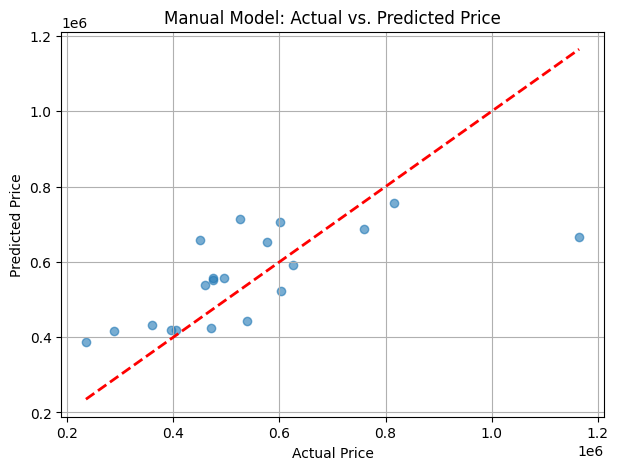


## SCIKIT-LEARN LINEAR MODEL

⭐ Parameters (scikit-learn) ⭐


In [29]:
# Assuming 'data' is loaded and using the verified column names
FEATURE_COLS = ['bathrooms', 'bedrooms', 'livingArea', 'age']
TARGET_COL = 'price'

# Select Features (X) and Target (y)
X = data[FEATURE_COLS]
y = data[TARGET_COL]

# Split Data (Train and Validation Sets)
X_train_raw, X_val_raw, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_val_scaled = scaler.transform(X_val_raw)

# Convert y to numpy array for matrix operations (Manual Model)
y_train_np = y_train.to_numpy().reshape(-1, 1)
y_val_np = y_val.to_numpy().reshape(-1, 1)

print("✅ Task 1: Data Preparation Complete.")

print("\n" + "="*60)
print("## MANUAL LINEAR MODEL (NORMAL EQUATION)")
print("="*60)

# Calculate Parameters (w = inv(X_T * X) * X_T * y)
X_train_manual = np.insert(X_train_scaled, 0, 1, axis=1) # Add intercept column
X_T = X_train_manual.T
w = np.linalg.inv(X_T @ X_train_manual) @ X_T @ y_train_np

# --- List its parameters ---
w0_manual = w[0][0]
w_manual = w[1:]
print("\n⭐ Parameters (Manual) ⭐")
print(f"Intercept (w0): {w0_manual:,.2f}")
print("Coefficients:")
for name, coeff in zip(FEATURE_COLS, w_manual.flatten()):
    print(f"  {name}: {coeff:,.4f}")

# Predictions and Scores
X_val_manual = np.insert(X_val_scaled, 0, 1, axis=1)
y_val_pred_manual = X_val_manual @ w

# --- List its scores for training and validation data ---
r2_val_manual = r2_score(y_val_np, y_val_pred_manual)
mse_val_manual = mean_squared_error(y_val_np, y_val_pred_manual)

print("\n📈 Validation Scores (Manual Model) 📈")
print(f"R2 Score: {r2_val_manual:.4f}")
print(f"MSE: {mse_val_manual:,.2f}")

# Plot a learning history graph (Note: Not applicable for Normal Equation)

# --- Visualize the model ---
plt.figure(figsize=(7, 5))
plt.scatter(y_val, y_val_pred_manual, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.title("Manual Model: Actual vs. Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()

print("\n" + "="*60)
print("## SCIKIT-LEARN LINEAR MODEL")
print("="*60)

# Create and Train the Model
model_skl = LinearRegression()
model_skl.fit(X_train_scaled, y_train)

# --- List its parameters ---
w0_skl = model_skl.intercept_
w_skl = model_skl.coef_

print("\n⭐ Parameters (scikit-learn) ⭐")

# Data preparation
- select X variables bathrooms', 'bedrooms', 'livingArea','age','price'
- standardize the variables

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming the feature variable X has been defined in previous code blocks:
# FEATURE_COLS = ['bathrooms', 'bedrooms', 'livingArea', 'age']
# X = data[FEATURE_COLS]

# Add an intercept term to the feature data (required for VIF calculation)
X_vif = X.copy()
X_vif['intercept'] = 1

# Calculate VIF values
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                     for i in range(len(X_vif.columns))]

# Remove the intercept row as it's not needed for feature analysis
vif_data = vif_data[vif_data['feature'] != 'intercept']
vif_data = vif_data.reset_index(drop=True)

print("--- VIF Values for Each Variable (Multicollinearity Check) ---")
print(vif_data)

# Interpretation: Variables with a high VIF value indicate a strong relationship with other features (multicollinearity).

--- VIF Values for Each Variable (Multicollinearity Check) ---
      feature       VIF
0   bathrooms  2.857373
1    bedrooms  2.036889
2  livingArea  2.303777
3         age  1.798314


# Display the VIF for each variable

# PCA
- Perform PCA
- show correlation matrix

✅ Data Preparation and Standardization Complete.

PCA 1. Explained Variance Ratios:
[0.58608262 0.27086577 0.09423669 0.04881491]


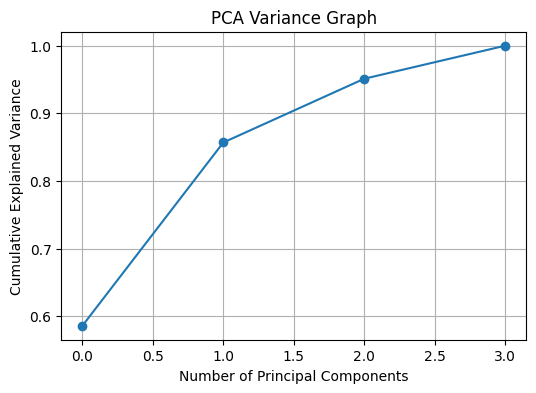

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# --- Data preparation: Select X and y ---
FEATURE_COLS = ['bathrooms', 'bedrooms', 'livingArea', 'age']
TARGET_COL = 'price'

X = data[FEATURE_COLS]
y = data[TARGET_COL]

# Standardization (Mandatory for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into Training and Test sets (using standardized data)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

print("✅ Data Preparation and Standardization Complete.")

# --- PCA Perform ---
# Create PCA to retain all components initially
pca = PCA(n_components=None)
pca.fit(X_train_scaled)

# Check the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("\nPCA 1. Explained Variance Ratios:")
print(explained_variance_ratio)

# Cumulative variance graph (to decide the number of components)
plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Variance Graph')
plt.grid(True)
plt.show()

# Example decision: Let's select the number of components that explain 95% of the variance.
# Since we have 4 features, 2 or 3 components are usually sufficient. We select 3 components.
n_components_selected = 3
pca_final = PCA(n_components=n_components_selected)

#

# Linear model
- Create and train a Linear Model for PCA variables
- Show R2 and RMSE

## 1. PCA TRANSFORMATION ##
Data successfully transformed into 3 principal components.
X_train_pca shape: (70, 3)

## 2. LINEAR MODEL TRAINING ##

## LINEAR MODEL RESULTS WITH PCA PRINCIPAL COMPONENTS
✅ Model R2 Score (with PCA): 0.6035
✅ Model RMSE (with PCA): $116,939.54


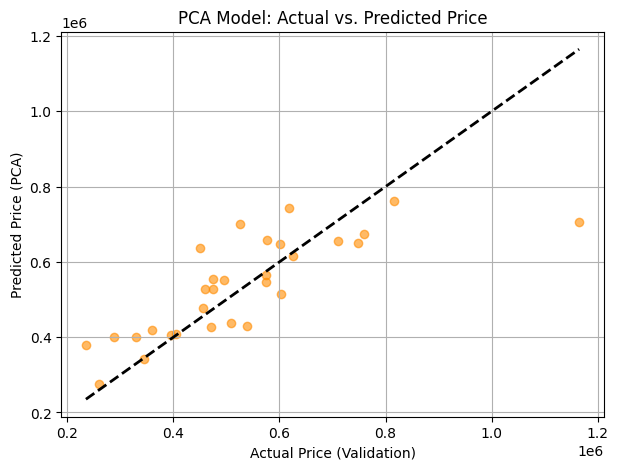

In [ ]:


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt


print("## 1. PCA TRANSFORMATION ##")

# Define the number of principal components (e.g., 3 components for 4 original features)
n_components = 3 

# Initialize PCA and fit on the scaled training data
pca = PCA(n_components=n_components)
pca.fit(X_train_scaled)

# Transform both training and test sets
# X_train_scaled and X_test_scaled MUST be defined in Cell 4
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Data successfully transformed into {n_components} principal components.")
print(f"X_train_pca shape: {X_train_pca.shape}")



print("\n## 2. LINEAR MODEL TRAINING ##")
pca_linear_model = LinearRegression()

# Train the model using the PCA transformed features (X_train_pca is now defined)
pca_linear_model.fit(X_train_pca, y_train)

# Make predictions on the transformed test set
y_pred_pca = pca_linear_model.predict(X_test_pca)




# Calculate R2 Score
r2_pca = r2_score(y_test, y_pred_pca)

# Calculate RMSE (Root Mean Squared Error)
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))

print("\n" + "="*50)
print("## LINEAR MODEL RESULTS WITH PCA PRINCIPAL COMPONENTS")
print("="*50)
print(f"✅ Model R2 Score (with PCA): {r2_pca:.4f}")
print(f"✅ Model RMSE (with PCA): ${rmse_pca:,.2f}") # Using currency format for price

# --- Visualization for Comparison ---
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred_pca, alpha=0.6, color='darkorange')
# Plotting the diagonal line where Predicted = Actual
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('PCA Model: Actual vs. Predicted Price')
plt.xlabel('Actual Price (Validation)')
plt.ylabel('Predicted Price (PCA)')
plt.grid(True)
plt.show()